# ENGR-E 221 Intelligent Systems I Fall 2020

## Lab 1 Introduction to agent based models
Thursday Lab: 8/27/2020 3:15 pm - 4:30 pm

Friday Lab: 8/28/2020 9:25 am - 10:40 am 

**Due: Friday 9/4/2020 11:59 pm EST**

In [1]:
# import useful libraries
import numpy as np
import matplotlib.pyplot as plt

## Warm-up (10 minutes)

The purpose of this warm-up is to introduce some of the basic techniques we will be using during the lab exercise and to proovide you with a resource for portions of code for you to use as building blocks. A basic resource for the python statements and tools we use throughout this lab: [python docs](https://docs.python.org/3/tutorial/controlflow.html). 


### 2-d Arrays with numpy

Intializing arrays based on user inputs is very useful. Here we make an array with 5 rows and 3 columns using numpy. 

In [4]:
import numpy as np #importing numpy and assigning a shorthand notation
rows = 5;
columns = 3;
A = np.zeros((rows,columns));

A

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

#### Shape of 2-d Array 

Access the number of a rows [0] or columns [1] in a 2-d array with the shape method object. ```numpy-array.shape[direction] ``` . Remember that the number of rows represents the length of a column vector and the number of columns represents the length of a row vector. 

In [5]:
A.shape[0] # number of rows (length of column vector)

5

In [6]:
A.shape[1] # number of columns (length of row vector)

3

#### Looping Through 2-d Arrays 

##### Assign a Value to all Indicies of an Array

Lets create a loop that will loop through all the values in a 2-d array and update the value from zero to the sum of the current indicies. It is useful to use the shape method within the loop to determine the length of each loop. 

This update rule is: $A(i, j) = i + j$ 

 Here are the loops for it. 

In [7]:
for i in range(0,A.shape[0]):
    for j in range(0,A.shape[1]):
        A[i,j] = i+j; 
A

array([[0., 1., 2.],
       [1., 2., 3.],
       [2., 3., 4.],
       [3., 4., 5.],
       [4., 5., 6.]])

##### Find and replace values with a loop

Now lets find all the values of 3 and replace them with 99 using a loop.

In [8]:
for i in range(0,A.shape[0]):
    for j in range(0,A.shape[1]):
        if A[i,j] == 3:
            A[i,j] = 99;

A

array([[ 0.,  1.,  2.],
       [ 1.,  2., 99.],
       [ 2., 99.,  4.],
       [99.,  4.,  5.],
       [ 4.,  5.,  6.]])

### Find and replace without a loop

Find and replace using two for loops is not very computationally effiecent. It may not be noticeable for small calculations but as systems grow and generate larger, more complex data sets the need for effiecent computing gains importance. Python allows us write easy and shorter statements by leveraging the methods built into objects. An is example is the 'where' method object from numpy.

[python classes and methods](https://docs.python.org/3/tutorial/classes.html)

In [13]:
A_new = np.where(A==3,99,A)
A_new

array([[ 0.,  1.,  2.],
       [ 1.,  2., 99.],
       [ 2., 99.,  4.],
       [99.,  4.,  5.],
       [ 4.,  5.,  6.]])

### Random events

An event exists with probability of $ p (0 < p < 1)$. Additionally there exists a uniform random number generator that assigns a random number, r , between 0 and 1. 
If the random number satisfies the statement $r < p$, then consider the event to have happened,
if $r > p$, then it didn't. The random number generator we will use is a method within numpy--numpy.random.uniform().  

[numpy.random.uniform](https://numpy.org/doc/stable/reference/random/generated/numpy.random.uniform.html)

In [16]:
np.random.uniform()

0.5925823393735745

## Task 1: Creating an Environment class (10 minutes) 

Create a class called **Environment** that has one member data: a 2-D array called **Food**. Create a default constructor that takes user inputs for the number of rows and columns and initializes the value of food in each position to 1.0. 

The first step is to create the Environment class like so:

```python
class Environment: ```

Now that we have a class we want to use the default contstructor to create a unique instance of **Food** each time the class is instatiated. We should have this now: 

```python
class Environment:
        def __init__ (self): ```
        
Since we are tasked with creating a 2-d member array of food this can be accomplished like so. 

```self.Food = np.zeros(rows,cols) ```

We now should have this:

```python
class Environment:
        def __init__ (self, rows,cols): 
        self.Food = np.zeros(rows,cols)```
        
Notice the inclusion of the rows and cols within the $__init__$ def, this is used for convience. At this point we have created an Environment class that has a 2-d member array called Food and filled with zeros. The next step is to use the loops from the warm up to generate a 2-d array of 1's. 

```python
for i in range(0,self.Food.shape[0]):
     for j in range(0,self.Food.shape[1]):```

In addition to the loops the following statement is used to assign the value of 1 to all the indicies of the Food array.

```self.food[i,j] = 1.0; ```

The finished bit of code looks like so: 

```python
class Environment:
        def __init__ (self, rows,cols): 
        self.Food = np.zeros(rows,cols)
        for i in range(0,self.Food.shape[0]):
            for j in range(0,self.Food.shape[1]):
                self.food[i,j] = 1.0
                ```




In [7]:
# Students Answers go below

import numpy as np

class Environment: #create a class
    def __init__( self, row, col): #must include the default constructor
        self.Food = np.zeros((row,col)) #assign the proper statement here to initilize array
        for i in range(0,self.Food.shape[0]): # This is the loop from the warm-up
            for j in range(0,self.Food.shape[1]):
                self.Food[i,j] = 1.0 # assign the proper values to the 2-d array of food
                
# When you think you are done please uncomment the code below and run this cell.
# If you see a 10 x 10 array of 1's you can move on. 

test = Environment(10,10)
test.Food

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]])

In [21]:
# Instructors Answer
class Environment: 
    def __init__( self, row, col):
        self.Food = np.zeros( (row,col))
        for i in range(0,self.Food.shape[0]):
            for j in range(0,self.Food.shape[1]):
                self.Food[i,j] = 1.0; 


## TASK 2: Improving the Environment class (20 minutes)

You will add these three functions to the Environment class.

1. **resize** Resizes the **Food** object to $M \times N$, where $M$ and $N$ are supplied arguments. 
 
2. **plot\_me** Creates a 2-D filled contour plot of **Food**.

3. **randomize** Assigns the values at each lattice site in **Food** to a (uniformly) random value between 0 and 1. 

#### Task 2.1 The resize Fucntion

In our original Environment class we built in the functionality to create a custom size array into the default constructor that is input when the class is instantiated. Following this same logic we can create a resize definition that allows the grid to be resized after it is instatiated. 

```python
class Environment:
    def __init__( self, row, col ):
        self.Food = np.zeros( (row,col))
        for i in range(0,self.Food.shape[0]):
            for j in range(0,self.Food.shape[1]):
                self.Food[i,j] = 1.0; 
         ```
         
The resize function will look very similar to the default constructor. We could have also hardcoded the intial indicies into the intialization of the array like this: ```python self.Food = np.zeros((48,64)) ```. In this case every time we instatiate the class an array of the size 48 x 64 is created. If you had a simulation where most of the time you used the exact same domain size hard coding may be applicable otherwise we will try and make our code as flexible as possible.   

 ```python
    def resize( self, newI, newJ ): 
        self.Food = np.zeros((NewI,NewJ))
        for i in range(0,self.Food.shape[0]):
            for j in range(0,self.Food.shape[1]):
                self.Food[i,j] = 1.0; 
                
                ```

In [23]:
# Add the resize definition and delete the return on line 12

class Environment: 
    def __init__( self, row, col):
        self.Food = np.zeros( (row,col))
        for i in range(0,self.Food.shape[0]):
            for j in range(0,self.Food.shape[1]):
                self.Food[i,j] = 1.0; 
    
    def resize(self, arg1, arg2):
        self.Food = np.zeros((NewI,NewJ))
        for i in range(0,self.Food.shape[0]):
            for j in range(0,self.Food.shape[1]):
                self.Food[i,j] = 1.0;

#### Task 2.2: The plot\_me Function 

A basic way to create a 2-d contour plot :

```python
x = np.arange(1,10);
y = x.reshape(-1,1);
z = x * y ; 
plt.figure()
cs = plt.contourf( z ); 
```

Notice the plt.figure() statement, this is required so that a unique figure is generated. Creating the plot\_me definition is straightforward with matplotlib but we must plot the transpose of Food, we will discuss this more next week. What we want to plot is this: ``` z = np.transpose(self.Food) ``` versus simply plotting self.Food.

In [24]:
# Task 2.2 add the plot_me definition

class Environment: 
    def __init__( self, row, col):
        self.Food = np.zeros( (row,col))
        for i in range(0,self.Food.shape[0]):
            for j in range(0,self.Food.shape[1]):
                self.Food[i,j] = 1.0; 
    
    def resize( self, newI, newJ ): 
        self.Food = np.zeros((NewI,NewJ))
        for i in range(0,self.Food.shape[0]):
            for j in range(0,self.Food.shape[1]):
                self.Food[i,j] = 1.0;
    
    def plot_me(self):
        return
    

#### Task 2.3 The randomize Function

Now we want to create a distribution of values within our 2-d array of Food to represent some habitat. From the warm-up we used numpy.random.uniform to generate a value between 0-1. We will apply it here to assign each value of the Food array a random value. 

In [25]:
# Add the randomize definition 

class Environment: 
    def __init__( self, row, col):
        self.Food = np.zeros( (row,col))
        for i in range(0,self.Food.shape[0]):
            for j in range(0,self.Food.shape[1]):
                self.Food[i,j] = 1.0; 
    
    def resize( self, newI, newJ ): 
        self.Food = np.zeros((NewI,NewJ))
        for i in range(0,self.Food.shape[0]):
            for j in range(0,self.Food.shape[1]):
                self.Food[i,j] = 1.0;
    

    def plot_me(self):
        return
    
    def randomize(self):
        return

In [8]:
# Instructors Answer

class Environment:
    def __init__( self, row,col ):
        self.Food = np.zeros( (row,col))
        for i in range(0,self.Food.shape[0]):
            for j in range(0,self.Food.shape[1]):
                self.Food[i,j] = 1.0; 
                
    def resize( self, newI, newJ ): 
        self.Food = np.zeros((NewI,NewJ))
        for i in range(0,self.Food.shape[0]):
            for j in range(0,self.Food.shape[1]):
                self.Food[i,j] = 1.0; 
                
    def randomize(self):
        for i in range(0,self.Food.shape[0]):
            for j in range(0,self.Food.shape[1]):
                self.Food[i,j] = np.random.uniform();
    
    def plot_me(self): # here we could even add args and apply names to the figures
            plt.figure(); # this produces a new plot instead of overwriting the old  
            CS = plt.contourf( np.transpose(self.Food) );
            

## TASK 3: Instantiating the environment (5 minutes)

Create an instance of the Environment class called **environment**, 
and plot it.  Randomize the food, and plot it again. 

In [5]:
# Students Answers go below

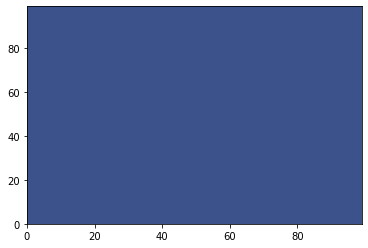

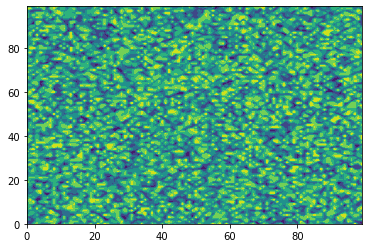

In [6]:
# Instructors Answer Surely this will not take ten minutes

environment = Environment(100,100);
environment.plot_me();
environment.randomize();
environment.plot_me();

## TASK 4: Creating a Prey agent class (10 minutes)

We are going to make **Prey** agents that graze 
on the food. We'll start by defining the class. Create a constructor that sets **eating_rate** to 0.05, and sets integers $(i,j)$ to be somewhere randomly in the array of food. 

```python
class Prey:
    def __init__(self):
        self.eating_rate =
        self.minimum_food = 
        self.i = # hint you should be using numpys random.randint(0, number of rows)
        self.j =
        
    def Eat:
        return
    
    ```

In [7]:
# Students Answers go below

In [8]:
# Instructors Answer
class Prey:
    def __init__( self ):
        self.eating_rate = 0.05
        self.minimum_food = 0.05
        self.i = np.random.randint( 0 , environment.Food.shape[0])
        self.j = np.random.randint( 0 , environment.Food.shape[1])
        
    def eat( self ):
        return

### TASK 5: Improving the Prey class by making it eat (15 minutes)

Let's make the Prey eat the food in their lattice site. 

$
\frac{d[Food]}{dt} = - [eating\_rate] [Food]
$

This says that the prey eats food faster when there's more food, and slower when there is less. 

Let's approxiate a solution to this. Remember the definition of the derivative: 

$
\frac{ d[Food]}{dt} \approx 
\frac{ Food(t+\Delta t) - Food(t)}{\Delta t} 
$

So, we can put this into the differential equation: 

$
\frac{ Food(t+\Delta t) - Food(t)}{\Delta t} 
 \approx  - [eating\_rate]Food(t) 
$

and then algebraically solve for Food at the next time $(t+\Delta t)$: 

$
Food(t+\Delta t)
 \approx  
 ( {1 - \Delta t} [eating\_rate]) Food(t)
$

(We'll look at this a bit more in class next week.) 

With this knowledge now update the Prey's eat function to have it eat the food at its lattice site $(i,j)$. Go ahead and assume $\Delta t = 1$. So we have: 

$Food(t+1) \approx (1 - [eating\_rate])[Food(t)]$

Hint using the \*= in python which follows this logic: X\*=99 $\rightarrow$ X = X\*99, may be useful. Since we have created a habitat i.e. the 2-d environment with food that we would like to update. This means we want to operate on the Environment.Food object. 

In [31]:
# Students Answers go below

In [32]:
# Instructors Answer

class Prey:
    def __init__( self ):
        self.eating_rate = 0.05
        self.minimum_food = 0.05
        self.i = np.random.randint( 0 , environment.Food.shape[0])
        self.j = np.random.randint( 0 , environment.Food.shape[1])
        
    def eat( self ):
        environment.Food[ self.i , self.j ] *= ( 1.0 - self.eating_rate )
         

## TASK 6: Instantiating the Prey (5 minutes)

Make a collection of ``` prey_agents = {}```, and make/instantiate
2500 instances of prey agents, which you add to this collection. Your code should look something like this: 
``` python
prey_agent = {}
numer_of_prey = #some number 
# loop with the update rule as follows
prey_agents[i] = Prey(); 
```

In [33]:
# Students Answers go below

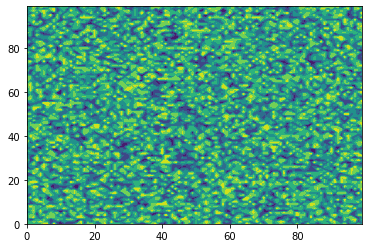

In [34]:
# Instructors Answer
prey_agents = {}
number_of_prey = 2500 
for n in range( 0 , number_of_prey):
    prey_agents[n] = Prey(); 
    
# Make the prey agents eat
for i in range( 0 , len(prey_agents)):
    prey_agents[i].eat() 
    
environment.plot_me()

## TASK 7: Running the model (5 minutes)
1. Make all your prey agents eat and plot Food.
```
loop for prey
prey_agent[i].eat 
end prey loop
Environment.plot_me()
```
2. Run 1000 time steps of the prey agents eating and plot Food.
```
loop for time steps
loop for prey
prey_agent[i].eat 
end prey loop
end time loop
Environment.plot_me()
```

In [ ]:
# Students Answers go below

In [ ]:
# Instructors Answer

# 1

for i in range( 0, len( prey_agents )):
    prey_agents[i].eat();
environment.plot_me();

# 2

for n in range(0, 1000 ):
    for i in range( 0, len( prey_agents )):
        prey_agents[i].eat();
environment.plot_me();